<a href="https://colab.research.google.com/github/abdul9870/abdul9870/blob/main/langgraph_tutorial_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an Intelligent Research Assistant with LangGraph
## A Hands-on Tutorial Using Open Source LLMs

Welcome to this hands-on tutorial on building an Intelligent Research Assistant using LangGraph! In this 2-hour session, we'll explore how to create a powerful, graph-based agent system that can help with research tasks.

### What You'll Learn
- Core concepts of LangGraph and graph-based agent architectures
- How to build a research assistant using only open source LLMs
- Techniques for implementing multi-agent systems
- Best practices for agent development

### Why Open Source LLMs?
This tutorial exclusively uses open source language models that are:
- Free to use without API costs
- Can run locally on your machine
- Accessible to everyone
- Customizable for your specific needs

Let's get started!

In [ ]:
# Install required packages
!pip install langchain_community langchain langgraph transformers sentence-transformers huggingface_hub
!pip install bitsandbytes duckduckgo-search beautifulsoup4 requests
!pip install matplotlib networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3

## 1. Setting Up Our Environment

Let's start by importing the necessary libraries and setting up our environment.

In [ ]:
# Import required libraries
from langchain_community.llms import HuggingFacePipeline
from langchain.prompts import PromptTemplate
from langchain.tools import Tool
from langchain.schema import HumanMessage, AIMessage
from langgraph.graph import StateGraph, END, START
from langgraph.prebuilt import ToolNode
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import DDGS
from typing import TypedDict, List, Dict, Any, Optional
import re

## 2. Loading the Language Model

For this tutorial, we'll use an open-source LLM from Hugging Face. We'll use a model that's small enough to run on a standard machine but powerful enough for our research assistant.

In [ ]:
!huggingface-cli login --token "HF_TOKEN"

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
The token `DQ2` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `DQ2`


In [ ]:
# Load a language model
model_id = "mistralai/Mistral-7B-Instruct-v0.2"

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    load_in_4bit=True
)

# Create a text generation pipeline
text_generation_pipeline = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    max_new_tokens=512,
    temperature=0.7,
    repetition_penalty=1.1,
    return_full_text=False
)

# Create a LangChain LLM from the pipeline
llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

# Test the model
response = llm("What is LangGraph and how does it relate to LangChain?")
print(response)

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Device set to use cuda:0
<ipython-input-5-0574e222aa1a>:25: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=text_generation_pipeline)
<ipython-input-5-0574e222aa1a>:28: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm("What is LangGraph and how does it relate to LangChain?")
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.




LangGraph refers to a graph-based knowledge representation system developed by researchers at the University of Southern California's Information Sciences Institute (USC-ISI). It was initially introduced in 2013 as a means to model and reason about natural language text using graph structures. The primary focus of LangGraph is to capture semantic relationships between words, concepts, entities, and events in text.

LangChain is a project that extends the capabilities of LangGraph in several ways:

1. Scalability: LangChain provides a more scalable infrastructure for managing and processing large amounts of data compared to traditional implementations of LangGraph. This is achieved through the use of distributed computing systems such as Apache Spark.

2. Multilingualism: LangChain supports the analysis of text in multiple languages, making it a multilingual knowledge representation system.

3. Real-time processing: LangChain can process text in real-time, enabling applications such a

## 3. Creating Research Tools

Our research assistant needs tools to gather information. Let's create two essential tools:
1. A web search tool to find relevant information
2. An information extraction tool to get detailed content from specific URLs

In [ ]:
# Create a web search function using DuckDuckGo
def search_web(query: str) -> str:
    """Search the web for information on a specific topic."""
    try:
        with DDGS() as ddgs:
            results = list(ddgs.text(query, max_results=5))

        if not results:
            return f"No results found for query: {query}"

        formatted_results = ""
        for i, result in enumerate(results, 1):
            formatted_results += f"Result {i}:\n"
            formatted_results += f"Title: {result['title']}\n"
            formatted_results += f"URL: {result['href']}\n"
            formatted_results += f"Summary: {result['body']}\n\n"

        return formatted_results
    except Exception as e:
        return f"Error searching for {query}: {str(e)}"

# Create a function to extract information from a URL
def extract_information(url: str) -> str:
    """Extract detailed information from a specific URL."""
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove script and style elements
        for script in soup(["script", "style"]):
            script.extract()

        # Get text
        text = soup.get_text(separator='\n')

        # Clean up text
        lines = (line.strip() for line in text.splitlines())
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        text = '\n'.join(chunk for chunk in chunks if chunk)

        # Truncate if too long
        max_length = 2000
        if len(text) > max_length:
            text = text[:max_length] + "... (content truncated)"

        return f"Extracted from {url}:\n\n{text}"
    except Exception as e:
        return f"Error extracting information from {url}: {str(e)}"

# Create our tools
tools = [
    Tool.from_function(
        func=search_web,
        name="search_web",
        description="Search the web for information on a specific topic"
    ),
    Tool.from_function(
        func=extract_information,
        name="extract_information",
        description="Extract detailed information from a specific URL"
    )
]

# Create a prompt template for our agent
AGENT_PROMPT = PromptTemplate.from_template(
    """You are a research assistant that helps find and analyze information.

Your task is to help answer research questions by using the tools available to you.
Always think step by step about what information you need and which tool would be best to get that information.

{chat_history}

Available tools:
{tools}

Human: {input}
Assistant: """
)

# Test our tools
print("Testing search tool:")
search_result = search_web("climate change effects")
print(search_result[:200] + "...\n")  # Print just the beginning for brevity

print("Testing extraction tool:")
extract_result = extract_information("https://en.wikipedia.org/wiki/Climate_change")
print(extract_result[:200] + "...")

Testing search tool:
Result 1:
Title: The Effects of Climate Change - NASA Science
URL: https://science.nasa.gov/climate-change/effects/
Summary: The potential future effects of global climate change include more frequent...

Testing extraction tool:
Extracted from https://en.wikipedia.org/wiki/Climate_change:

Climate change - Wikipedia
Jump to content
Main menu
Main menu
move to sidebar
hide
Navigation
Main page
Contents
Current events
Random ar...


## 4. Building the Agent with LangGraph

Now, let's build our research assistant using LangGraph. We'll create a graph with nodes for the agent and tools, and define the flow between them.

In [ ]:
# Define our state
class AgentState(TypedDict):
    messages: List[Any]

# Create a function to format messages for our LLM
def format_messages(state):
    """Format the messages for our LLM."""
    messages = state["messages"]

    # Convert tools to string format
    tools_str = "\n".join([f"{tool.name}: {tool.description}" for tool in tools])

    # Format chat history
    chat_history = ""
    for message in messages[:-1]:  # All messages except the last one
        if isinstance(message, HumanMessage):
            chat_history += f"Human: {message.content}\n"
        elif isinstance(message, AIMessage):
            chat_history += f"Assistant: {message.content}\n"

    # Get the last message (the user's query)
    last_message = messages[-1].content if messages else ""

    # Format the prompt
    formatted_prompt = AGENT_PROMPT.format(
        chat_history=chat_history,
        tools=tools_str,
        input=last_message
    )

    return formatted_prompt

# Create a node for our agent
def agent_node(state):
    """Process the current state and generate a response."""
    # Format the messages for our LLM
    formatted_prompt = format_messages(state)

    # Get a response from the LLM
    response = llm(formatted_prompt)

    # Parse the response to check for tool calls
    # This is a simple parsing approach - in production, you might want to use a more robust method
    if "search_web(" in response or "extract_information(" in response:
        # Extract the tool name and arguments
        if "search_web(" in response:
            tool_name = "search_web"
            # Extract the query between parentheses
            start_idx = response.find("search_web(") + len("search_web(")
            end_idx = response.find(")", start_idx)
            query = response[start_idx:end_idx].strip('"\'')
            args = {"query": query}
        else:
            tool_name = "extract_information"
            # Extract the URL between parentheses
            start_idx = response.find("extract_information(") + len("extract_information(")
            end_idx = response.find(")", start_idx)
            url = response[start_idx:end_idx].strip('"\'')
            args = {"url": url}

        # Create a message with the tool call
        message = AIMessage(
            content=response,
            tool_calls=[{"name": tool_name, "args": args}]
        )
    else:
        # Create a regular message
        message = AIMessage(content=response)

    # Update the state with the new message
    return {"messages": [message]}

# Create a function to determine the next step
def should_continue(state):
    """Determine whether to continue to tools or end."""
    messages = state["messages"]
    last_message = messages[-1]

    # If the last message is from the agent and contains a tool call
    if isinstance(last_message, AIMessage) and hasattr(last_message, "tool_calls") and last_message.tool_calls:
        return "tools"

    # Otherwise, end the conversation
    return END

# Create our graph
graph = StateGraph(AgentState)

# Add nodes
graph.add_node("agent", agent_node)
graph.add_node("tools", ToolNode(tools))

# Add edges with conditional routing
graph.add_edge(START, "agent")
graph.add_conditional_edges("agent", should_continue)
graph.add_edge("tools", "agent")

# Compile the graph
agent_executor = graph.compile()

print("Graph-based agent created successfully!")

Graph-based agent created successfully!


## 5. Testing Our Research Assistant

Let's test our research assistant with some example queries to see how it performs.

In [ ]:
# Test our research assistant
def run_research_assistant(query):
    """Run the research assistant with a query."""
    # Initialize with the user's query
    inputs = {"messages": [HumanMessage(content=query)]}

    # Run the agent
    result = agent_executor.invoke(inputs)

    # Extract and print the conversation
    messages = inputs["messages"] + result["messages"]
    for message in messages:
        if isinstance(message, HumanMessage):
            print(f"Human: {message.content}")
        elif isinstance(message, AIMessage):
            print(f"Assistant: {message.content}")
            if hasattr(message, "tool_calls") and message.tool_calls:
                print(f"[Tool Call: {message.tool_calls[0]['name']}]")

    return result

# Test with a research question
run_research_assistant("What are the latest developments in renewable energy technology?")

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Human: What are the latest developments in renewable energy technology?
Assistant:  To answer your question, I'd first use the search_web tool to find the latest news and developments in renewable energy technology. Once I have a good understanding of the current state of the field, I could then use the extract_information tool to gather more detailed data from specific articles or reports that seem particularly relevant. This will allow me to provide you with accurate and up-to-date information on the topic.


{'messages': [AIMessage(content=" To answer your question, I'd first use the search_web tool to find the latest news and developments in renewable energy technology. Once I have a good understanding of the current state of the field, I could then use the extract_information tool to gather more detailed data from specific articles or reports that seem particularly relevant. This will allow me to provide you with accurate and up-to-date information on the topic.", additional_kwargs={}, response_metadata={})]}

## 6. Advanced Features: Asynchronous Execution

LangGraph supports asynchronous execution, which can be useful for handling multiple requests or long-running operations.

In [ ]:
pip install -U langgraph

In [ ]:
from langgraph.graph import StateGraph
from langgraph.constants import START
from langgraph.prebuilt import ToolNode
from langchain.schema import HumanMessage
import asyncio

# (Assumes AgentState, agent_node, tools, and should_continue are already defined)

# Create an async graph
async_graph = StateGraph(AgentState)

# Add nodes & edges
async_graph.add_node("agent", agent_node)
async_graph.add_node("tools", ToolNode(tools))
async_graph.add_edge(START, "agent")
async_graph.add_conditional_edges("agent", should_continue)
async_graph.add_edge("tools", "agent")

# Compile (no async_mode flag)
async_executor = async_graph.compile()

# Async helper
async def run_async_research(query: str):
    state = {"messages": [HumanMessage(content=query)]}
    return await async_executor.ainvoke(state)

async def run_multiple_queries():
    queries = [
        "What is quantum computing?",
        "How does artificial intelligence impact healthcare?",
        "What are the environmental benefits of electric vehicles?"
    ]
    results = await asyncio.gather(*(run_async_research(q) for q in queries))
    for idx, (q, res) in enumerate(zip(queries, results), 1):
        print(f"\nResult for query {idx}: {q}")
        print(res["messages"][0].content[:200] + "…")
    return results

# In a Jupyter or other environment with a running loop, just:
await run_multiple_queries()

# (In a standalone script without an event loop, you can still use:)
# asyncio.run(run_multiple_queries())


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



Result for query 1: What is quantum computing?
 To understand quantum computing, I'll first use the search_web tool to gather some basic information about it. Then, I will use the extract_information tool to extract detailed information from one o…

Result for query 2: How does artificial intelligence impact healthcare?
1. First, I will use the search_web tool to gather general information about "Artificial Intelligence in Healthcare". This will provide an overview of the topic.
2. After getting a broad understanding…

Result for query 3: What are the environmental benefits of electric vehicles?
1. Reduces Greenhouse Gas Emissions: Electric vehicles (EVs) produce zero tailpipe emissions, reducing greenhouse gas emissions significantly compared to conventional vehicles.
2. Efficient Energy Use…


[{'messages': [AIMessage(content=" To understand quantum computing, I'll first use the search_web tool to gather some basic information about it. Then, I will use the extract_information tool to extract detailed information from one of the most informative links returned by the search.", additional_kwargs={}, response_metadata={})]},
 {'messages': [AIMessage(content='1. First, I will use the search_web tool to gather general information about "Artificial Intelligence in Healthcare". This will provide an overview of the topic.\n2. After getting a broad understanding, I can then use the extract_information tool to delve deeper into specific aspects of AI\'s impact on healthcare, such as its role in medical diagnosis or patient care. This will allow me to extract detailed, accurate information directly from authoritative sources.', additional_kwargs={}, response_metadata={})]},
 {'messages': [AIMessage(content="1. Reduces Greenhouse Gas Emissions: Electric vehicles (EVs) produce zero tail

## 7. Adding Memory to Our Agent

Let's enhance our agent by adding memory capabilities, allowing it to remember previous interactions.

In [ ]:
# Create a function to add memory to the state
def add_memory_to_state(state):
    """Add memory variables to the state."""
    # In a real application, you might load memory from a database
    # For this example, we'll just use a simple in-memory approach

    # Create a new state with memory variables
    new_state = state.copy()

    # Add memory variables (e.g., user preferences, previous topics)
    memory_variables = {
        "user_preferences": ["renewable energy", "climate science", "technology"],
        "previous_topics": ["solar power efficiency", "wind turbine innovations"],
        "last_interaction": "2023-05-15"
    }

    new_state["memory"] = memory_variables

    return new_state

# Create a graph with memory
memory_graph = StateGraph(AgentState)
memory_graph.add_node("memory", add_memory_to_state)
memory_graph.add_node("agent", agent_node)
memory_graph.add_node("tools", ToolNode(tools))

# Add edges
memory_graph.add_edge(START, "memory")
memory_graph.add_edge("memory", "agent")
memory_graph.add_conditional_edges("agent", should_continue)
memory_graph.add_edge("tools", "memory")

# Compile the graph
memory_executor = memory_graph.compile()

print("Memory-enabled graph created successfully!")

Memory-enabled graph created successfully!


## 8. Visualizing Our Graph

LangGraph provides tools to visualize the structure of our agent graph, which can be helpful for understanding and debugging complex flows.

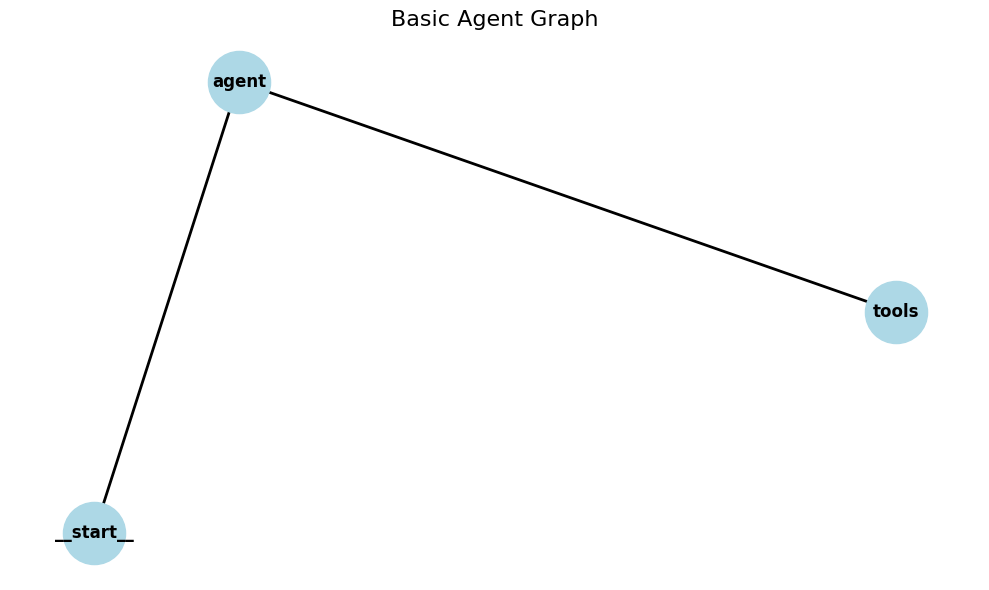

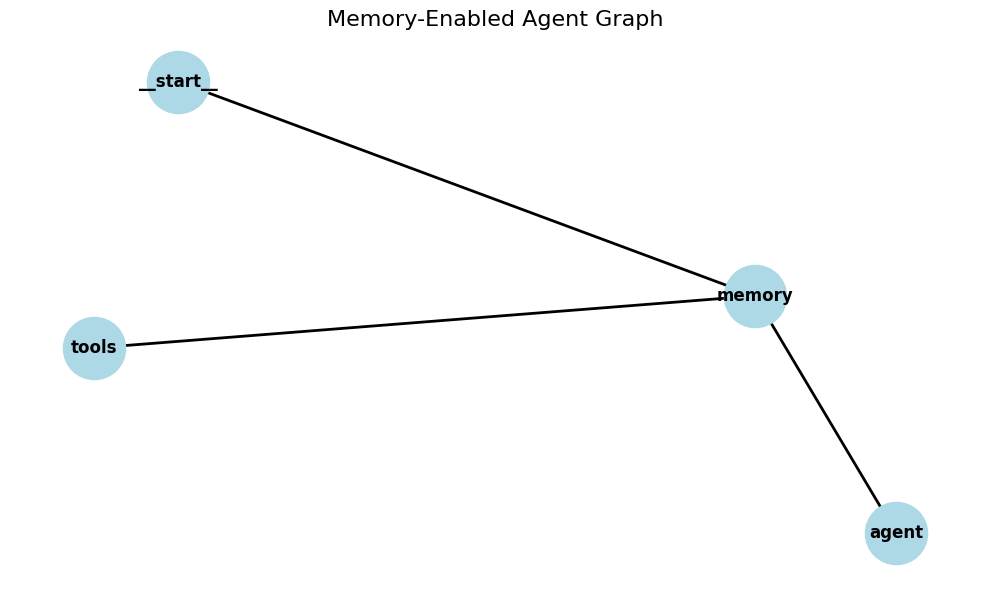

In [ ]:
# Visualize our graph
import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph(graph, title="Agent Graph"):
    """Visualize a LangGraph graph using NetworkX and Matplotlib."""
    # Convert to NetworkX graph
    G = nx.DiGraph()

    # Add nodes
    for node in graph.nodes:
        G.add_node(node)

    # Add edges
    for edge in graph.edges:
        G.add_edge(edge[0], edge[1])

    # Create the plot
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, arrowsize=20)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    # Add title and remove axis
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.tight_layout()

    return plt

# Visualize our different graphs
visualize_graph(graph, "Basic Agent Graph")
plt.savefig("basic_agent_graph.png")
plt.show()

visualize_graph(memory_graph, "Memory-Enabled Agent Graph")
plt.savefig("memory_agent_graph.png")
plt.show()

## 9. Conclusion and Next Steps

In this tutorial, we've built a research assistant using LangGraph and open-source LLMs. Here's a summary of what we've learned:

1. How to set up a graph-based agent architecture
2. How to create and integrate tools for web search and information extraction
3. How to implement conditional routing in the agent flow
4. How to add memory capabilities to our agent
5. How to visualize and understand the agent's graph structure

### Next Steps

To further enhance your research assistant, consider:

- Adding more specialized tools (e.g., PDF parsing, data analysis)
- Implementing more robust memory systems (e.g., vector databases)
- Creating a user interface for easier interaction
- Fine-tuning the LLM for better performance on research tasks
- Adding error handling and recovery mechanisms

Thank you for participating in this tutorial! We hope you found it valuable and that it inspires you to build your own intelligent agents using LangGraph.